In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments

┌ Info: Precompiling ReinforcementLearning [158674fc-8238-5cab-b5ba-03dfc80d1318]
└ @ Base loading.jl:1264
┌ Warning: /mnt/E4E0A9C0E0A998F6/github/ReinforcementLearning.jl/src/components/agents/q_agents is not an existing directory, Revise is not watching
└ @ Revise /home/tj/.julia/packages/Revise/D6h31/src/Revise.jl:419
┌ Warning: /mnt/E4E0A9C0E0A998F6/github/ReinforcementLearning.jl/src/patches is not an existing directory, Revise is not watching
└ @ Revise /home/tj/.julia/packages/Revise/D6h31/src/Revise.jl:419


In [2]:
using RLIntro
using RLIntro.BlackJack

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1264


In [3]:
env = BlackJackEnv()

ns, na = length(observation_space(env)), length(action_space(env))

(220, 2)

In [4]:
stick_action = findall(x -> x == :stick, BlackJack.ACTIONS)[]

2

In [5]:
table = fill(1, size(BlackJack.INDS)...)
table[:, 10:11, :] .= stick_action
table = reshape(table, :);

In [6]:
agent = Agent(
    VBasedPolicy(
        MonteCarloLearner(TabularVApproximator(ns)),
        (learner, obs) -> table[get_state(obs)]),
    episode_RTSA_buffer()
);

In [7]:
run(agent, env, StopAfterEpisode(10000))

Progress:   0%|                                         |  ETA: 1:30:25
4m  TRAINING/EPISODE:  0
Progress:   0%|                                         |  ETA: 0:57:29
4m  TRAINING/EPISODE:  1
Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:00
4m  TRAINING/EPISODE:  4981
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
  TRAINING/EPISODE:  6375


EmptyHook()

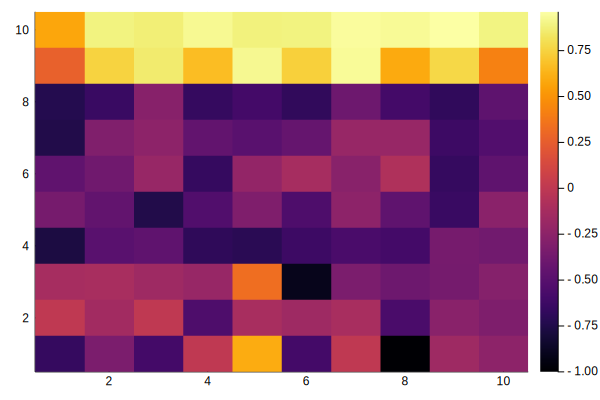

In [8]:
using Plots
V = reshape(agent.π.learner.approximator.table, size(BlackJack.INDS)...)
V_with_usable_ace = V[1, 2:11, :]
V_without_usable_ace = V[2, 2:11, :]

heatmap(V_with_usable_ace)

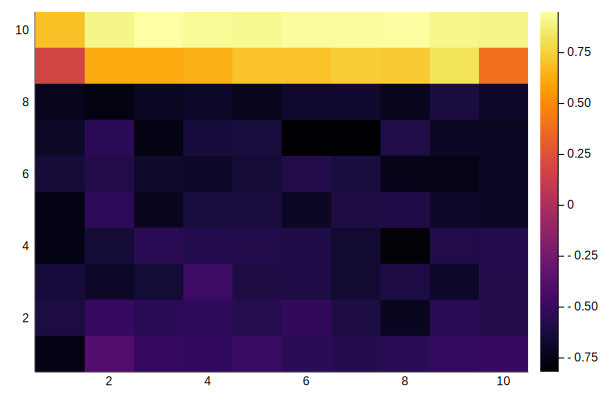

In [9]:
heatmap(V_without_usable_ace)

In [13]:
agent = Agent(
    VBasedPolicy(
        MonteCarloLearner(TabularVApproximator(ns)),
        (learner, obs) -> table[get_state(obs)]),
    episode_RTSA_buffer()
);
run(agent, env, StopAfterEpisode(500000))

EmptyHook()

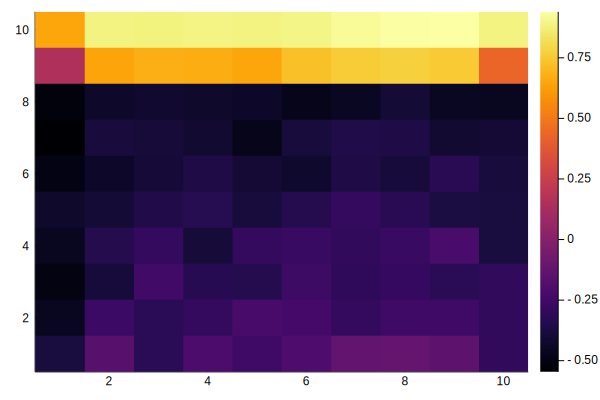

In [11]:
V = reshape(agent.π.learner.approximator.table, size(BlackJack.INDS)...)
V_with_usable_ace = V[1, 2:11, :]
V_without_usable_ace = V[2, 2:11, :]

heatmap(V_with_usable_ace)

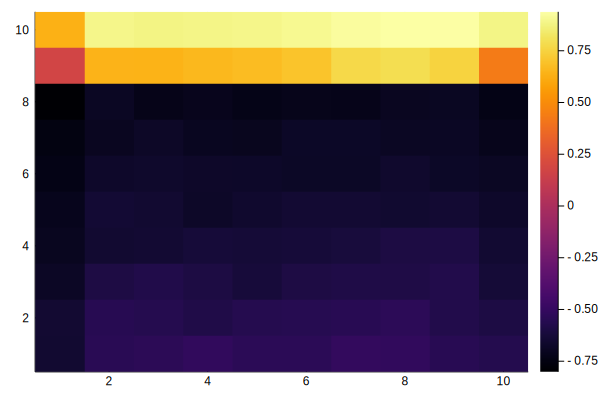

In [12]:
heatmap(V_without_usable_ace)